# Assignment 1

Anders Sønderby

### Part A - Manual SGD

We will use the Insurance dataset from class and manually compute the training process of the parameters of a deep learning model with forward pass, Feedforward loss evaluation, Backward pass (gradient calculation) and Back propagation (update weights)

In [28]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
# Load data

data = pd.read_csv('https://raw.githubusercontent.com/aaubs/ds-master/main/data/Swedish_Auto_Insurance_dataset.csv')

data.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


First we scale the variables, so that all input and output operate in comparable ranges, making the training more reliable

In [30]:
# Using sklearn
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_s = pd.DataFrame(data_scaled, columns=data.columns)

data_s.head()

,X,Y
0,0.870968,0.929654
1,0.153226,0.109427
2,0.104839,0.037186
3,1.000000,1.000000
4,0.322581,0.282804


### Stochastic Gradient Descent (Single Data Point)

#### 1. Select one observation
$$
x_1 , y_1
$$
---
#### 2. Forward pass
$$
\hat{y}_1 = w x_1
$$
---
#### 3. Loss calculation (Mean Squared Error)
$$
\mathcal{L}_1 = (t_1 - \hat{y}_1)^2
$$
---
#### 4. Backward pass (gradient)
$$
\frac{\partial \mathcal{L}_1}{\partial w}
= 2 x_1 (\hat{y}_1 - t_1)
$$
---
#### 5. Parameter update (SGD)
$$
w_{k+1} = w_k - \eta \frac{\partial \mathcal{L}_1}{\partial w}
$$
---
#### 6. Repeat
Repeat for all observations until convergence.

<br>

**Sample 1**

In [31]:
# Hyperparameters
learning_rate = 2
w = 1 # Initial weight

#Selecting first data point
x_1 = data_s.loc[0, 'X']
t_1 = data_s.loc[0, 'Y']

# Forward pass
y_hat = w * x_1

# Loss calculation (MSE)
loss = (t_1 - y_hat) ** 2

# Gradient of loss w.r.t w
gradient = 2 * x_1 * (y_hat - t_1)

# Update weight
w_new = w - (learning_rate * gradient)

print(
    f"Sample 1: "
    f"x={x_1}, t={t_1}, "
    f"ŷ={y_hat:.4f}, "
    f"loss={loss:.4f},"
    f"grad={gradient:.4f}, "
    f"Δw={learning_rate * gradient:.4f}, "
    f"old w={w:.4f}, "
    f"new w={w_new:.4f}, "
    
    )
                      
                    

Sample 1: x=0.8709677419354839, t=0.929654192325912, ŷ=0.8710, loss=0.0034,grad=-0.1022, Δw=-0.2045, old w=1.0000, new w=1.2045, 


Then let us move on to sample 2 where we use the new w as our initial weight

In [32]:
#Selecting second data point
x_2 = data_s.loc[1, 'X']
t_2 = data_s.loc[1, 'Y']

# Forward pass
y_hat_2 = w_new * x_2

# Loss calculation
loss = (t_2 - y_hat_2) ** 2

# Gradient of loss w.r.t w
gradient = 2 * x_2 * (y_hat_2 - t_2)

w_new_2 = w_new - (learning_rate * gradient)

print(
    f"Sample 2: "
    f"x={x_2}, t={t_2}, "
    f"ŷ={y_hat_2:.4f}, "
    f"loss={loss:.4f},"
    f"grad={gradient:.4f}, "
    f"Δw={learning_rate * gradient:.4f}, "
    f"old w={w_new:.4f}, "
    f"new w={w_new_2:.4f}, "
    
    )

Sample 2: x=0.1532258064516129, t=0.1094268119374704, ŷ=0.1846, loss=0.0056,grad=0.0230, Δw=0.0460, old w=1.2045, new w=1.1584, 


And the last sample

In [33]:
#Selecting third data point
x_3 = data_s.loc[2, 'X']
t_3 = data_s.loc[2, 'Y']

# Forward pass
y_hat_3 = w_new_2 * x_3

# Loss calculation
loss = (t_3 - y_hat_3) ** 2

# Gradient of loss w.r.t w
gradient = 2 * x_3 * (y_hat_3 - t_3)

w_new_3 = w_new_2 - (learning_rate * gradient)

print(
    f"Sample 3: "
    f"x={x_3}, t={t_3}, "
    f"ŷ={y_hat_3:.4f}, "
    f"loss={loss:.4f},"
    f"grad={gradient:.4f}, "
    f"Δw={learning_rate * gradient:.4f}, "
    f"old w={w_new_2:.4f}, "
    f"new w={w_new_3:.4f}, "
    
    )

Sample 3: x=0.10483870967741934, t=0.037186167693036475, ŷ=0.1214, loss=0.0071,grad=0.0177, Δw=0.0353, old w=1.1584, new w=1.1231, 


In [34]:
print(f"Initial w: 1.0000")
print(f"w after 1 sample: {w_new:.4f}")
print(f"w after 2 samples: {w_new_2:.4f}")
print(f"Final w after 3 samples: {w_new_3:.4f}")


Initial w: 1.0000
w after 1 sample: 1.2045
w after 2 samples: 1.1584
Final w after 3 samples: 1.1231


### Part B - Attention Contextualisation

We a going to show how the concept of attention mechanism can create contextual word embeddings. The homonym we are going to use is `bat`which can be the animal and the sports equipment and we are going to test on these two sentences:

**Sentence 1: The bat flew at night.** <br>
**Sentence 2: The bat hit the baseball.**



First we will create small 2d vectors word embeddings which make sense it the contextualisation process.

In [35]:
import numpy as np


# Toy 2D embeddings for attention illustration
embeddings = {
    "the": np.array([0.1, 0.1]),
    "bat": np.array([0.5, 0.5]),      # ambiguous word
    "flew": np.array([0.6, 0.7]),     # context for animal meaning
    "hit": np.array([0.6, 0.4]),      # context for sports meaning
    "at": np.array([0.2, 0.1]),
    "night": np.array([0.7, 0.8]),    # animal activity context
    "baseball": np.array([0.5, 0.3]), # sports context
}


Then we are going to follow the process of the attention mechanism which is:
1. Calculate similarity using dot product (Q*K) to find how relevant each word are for the individual word's meaning
2. Then we will turn the similarity scores into weights using Softmax
3. Calculate a contextualised embedding for each word.

In [36]:
# Sentence 1
sentence_1 = ["the", "bat", "flew", "at", "night"]

# Initialize matrices for Q, K, V
Q_1 = np.array([embeddings[word] for word in sentence_1])
K_1 = np.array([embeddings[word] for word in sentence_1])
V_1 = np.array([embeddings[word] for word in sentence_1])

# Step 1: Similarity - Calculate dot products for Q and K (attention scores)
attention_scores_1 = Q_1.dot(K_1.T)

# Step 2: Weights - Apply softmax to attention scores
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

attention_weights_1 = np.apply_along_axis(softmax, 1, attention_scores_1)

# Step 3: Contextualized vector - Multiply attention weights by V and sum to get output vectors
attention_output_1 = attention_weights_1.dot(V_1)

In [37]:
Q_1

array([[0.1, 0.1],
       [0.5, 0.5],
       [0.6, 0.7],
       [0.2, 0.1],
       [0.7, 0.8]])

In [38]:
attention_scores_1

array([[0.02, 0.1 , 0.13, 0.03, 0.15],
       [0.1 , 0.5 , 0.65, 0.15, 0.75],
       [0.13, 0.65, 0.85, 0.19, 0.98],
       [0.03, 0.15, 0.19, 0.05, 0.22],
       [0.15, 0.75, 0.98, 0.22, 1.13]])

In [39]:
# Step 4: Convert to DataFrame for labeled display
attention_df = pd.DataFrame(
    attention_weights_1,
    index=sentence_1,
    columns=sentence_1
)

# Display attention matrix
print("Attention Matrix (rows = queries, columns = keys):")
print(attention_df)

Attention Matrix (rows = queries, columns = keys):
            the       bat      flew        at     night
the    0.186970  0.202542  0.208711  0.188849  0.212927
bat    0.139046  0.207432  0.241001  0.146175  0.266347
flew   0.122881  0.206690  0.252451  0.130480  0.287499
at     0.180817  0.203870  0.212191  0.184470  0.218653
night  0.112964  0.205833  0.259062  0.121154  0.300987


In [40]:
attention_output_1

array([[0.43201357, 0.45529243],
       [0.47789901, 0.5140164 ],
       [0.49444844, 0.53539544],
       [0.43728198, 0.46191935],
       [0.50457172, 0.54846112]])

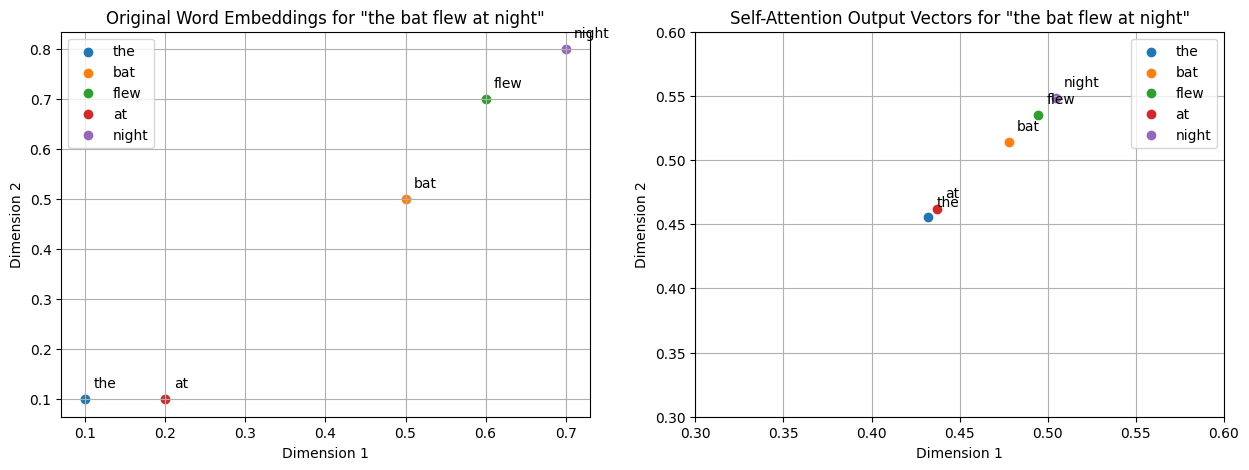

In [41]:
# Step 1: Extract original embeddings
sentence_embeddings_1 = np.array([embeddings[word] for word in sentence_1])

# Step 2: Set up the plot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot original embeddings
for i, word in enumerate(sentence_1):
    x0, y0 = sentence_embeddings_1[i]
    axes[0].scatter(x0, y0, label=f"{word}")
    axes[0].annotate(
        word,
        xy=(x0, y0),
        xytext=(6, 6),
        textcoords='offset points',
        ha='left',
        va='bottom',
        fontsize=10,
        clip_on=False
    )

axes[0].set_title('Original Word Embeddings for "the bat flew at night"')
axes[0].set_xlabel('Dimension 1')
axes[0].set_ylabel('Dimension 2')
axes[0].grid(True)
axes[0].legend()

# Plot attention output vectors
# For the attention output plot
for i, word in enumerate(sentence_1):
    x1, y1 = attention_output_1[i]
    axes[1].scatter(x1, y1, label=f"{word}")
    axes[1].annotate(
        word,
        xy=(x1, y1),
        xytext=(6, 6),
        textcoords='offset points',
        ha='left',
        va='bottom',
        fontsize=10,
        clip_on=False
    )

axes[1].set_title('Self-Attention Output Vectors for "the bat flew at night"')
axes[1].set_xlabel('Dimension 1')
axes[1].set_ylabel('Dimension 2')
axes[1].grid(True)
axes[1].legend()
# set fixed x/y ranges on the second axes
axes[1].set_xlim(0.3, 0.6)
axes[1].set_ylim(0.3, 0.6)

plt.show()

Let us calculate the euclidian distance between the words 'bat' and 'night', before and after the contextualisation:

In [51]:
# Calculate the Euclidean distance between "bat" and "night" in the original embeddings for the second sentence
original_bat = embeddings["bat"]
original_night = embeddings["night"]  # The same embedding for "night" is used as in the first sentence
distance_original = np.linalg.norm(original_bat - original_night)

# Find the positions of "bat" and "night" in the second sentence
bat_position = sentence_1.index("bat")
night_position = sentence_1.index("night")

# Calculate the Euclidean distance between "bat" and "night" in the output vectors for the second sentence
output_bat = attention_output_1[bat_position]
output_night = attention_output_1[night_position]
distance_output = np.linalg.norm(output_bat - output_night)

print("Distance in original embeddings:", distance_original)
print(f"Distance in attention output vectors: {distance_output:.4f}")

Distance in original embeddings: 0.36055512754639896
Distance in attention output vectors: 0.0436


Now let us go through the same process for sentence 2:

In [43]:
# Sentence 2
sentence_2 = ["the", "bat", "hit", "the", "baseball"]

# Initialize matrices for Q, K, V
Q_2 = np.array([embeddings[word] for word in sentence_2])
K_2 = np.array([embeddings[word] for word in sentence_2])
V_2 = np.array([embeddings[word] for word in sentence_2])

# Step 1: Similarity - Calculate dot products for Q and K (attention scores)
attention_scores_2 = Q_2.dot(K_2.T)

# Step 2: Weights - Apply softmax to attention scores
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

attention_weights_2 = np.apply_along_axis(softmax, 1, attention_scores_2)

# Step 3: Contextualized vector - Multiply attention weights by V and sum to get output vectors
attention_output_2 = attention_weights_2.dot(V_2)

In [44]:
Q_2

array([[0.1, 0.1],
       [0.5, 0.5],
       [0.6, 0.4],
       [0.1, 0.1],
       [0.5, 0.3]])

In [45]:
# Step 4: Convert to DataFrame for labeled display
attention_df_2 = pd.DataFrame(
    attention_weights_2,
    index=sentence_2,
    columns=sentence_2
)

# Display attention matrix
print("Attention Matrix (rows = queries, columns = keys):")
print(attention_df_2)

Attention Matrix (rows = queries, columns = keys):
               the       bat       hit       the  baseball
the       0.191263  0.207192  0.207192  0.191263  0.203090
bat       0.157890  0.235545  0.235545  0.157890  0.213130
hit       0.156472  0.233429  0.238145  0.156472  0.215482
the       0.191263  0.207192  0.207192  0.191263  0.203090
baseball  0.164501  0.226538  0.231115  0.164501  0.213346


In [46]:
attention_output_2

array([[0.36770907, 0.28565264],
       [0.39724217, 0.30750728],
       [0.39863675, 0.3079114 ],
       [0.36770907, 0.28565264],
       [0.391511  , 0.3026189 ]])

In [50]:
# Calculate the Euclidean distance between "bat" and "baseball" in the original embeddings for the second sentence
original_bat = embeddings["bat"]
original_bb = embeddings["baseball"]  # The same embedding for "baseball" is used as in the first sentence
distance_original_2 = np.linalg.norm(original_bat - original_bb)

# Find the positions of "bat" and "baseball" in the second sentence
bat_position_2 = sentence_2.index("bat")
baseball_position = sentence_2.index("baseball")

# Calculate the Euclidean distance between "bat" and "baseball" in the output vectors for the second sentence
output_bat_2 = attention_output_2[bat_position_2]
output_bb = attention_output_2[baseball_position]
distance_output_2 = np.linalg.norm(output_bat_2 - output_bb)

print("Distance in original embeddings:", distance_original_2)
print(f"Distance in attention output vectors: {distance_output_2:.4f}")

Distance in original embeddings: 0.2
Distance in attention output vectors: 0.0075


Let us summarize by looking at the original and contextualised embeddings of the words 'bat', 'night' and 'baseball' as well as the orignial and contextual euclidian distances

In [48]:
def round_vector(vec, decimals=4):
    return np.round(vec, decimals)

overview_data = {
    "Word": ["bat", "night", "bat", "baseball"],
    "Original Embedding": [
        round_vector(embeddings["bat"]),
        round_vector(embeddings["night"]),
        round_vector(embeddings["bat"]),
        round_vector(embeddings["baseball"])
    ],
    "Contextualized Embedding": [
        round_vector(attention_output_1[sentence_1.index("bat")]),
        round_vector(attention_output_1[sentence_1.index("night")]),
        round_vector(attention_output_2[sentence_2.index("bat")]),
        round_vector(attention_output_2[sentence_2.index("baseball")])
    ]
}

overview_df = pd.DataFrame(overview_data)
print(overview_df)


       Word Original Embedding Contextualized Embedding
0       bat         [0.5, 0.5]          [0.4779, 0.514]
1     night         [0.7, 0.8]         [0.5046, 0.5485]
2       bat         [0.5, 0.5]         [0.3972, 0.3075]
3  baseball         [0.5, 0.3]         [0.3915, 0.3026]


We can see from the transformation to contextualized embeddings, the words bat and night in the first sentence becomes very similar vectors, but bat in the second sentence becomes a very different vector close to baseball. This highlights the power of the attention mechanism that can handle the challenge of words having multiple meaningsæ